In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

# sklearn all the machine learning terms like preprosessing

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, classification_report , confusion_matrix


In [2]:
df = pd.read_csv("data/water_potability.csv")
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [4]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [6]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

when training values there are no any null values.if there are null values we should fix it by puting mean , .... or removing the null values

<Axes: >

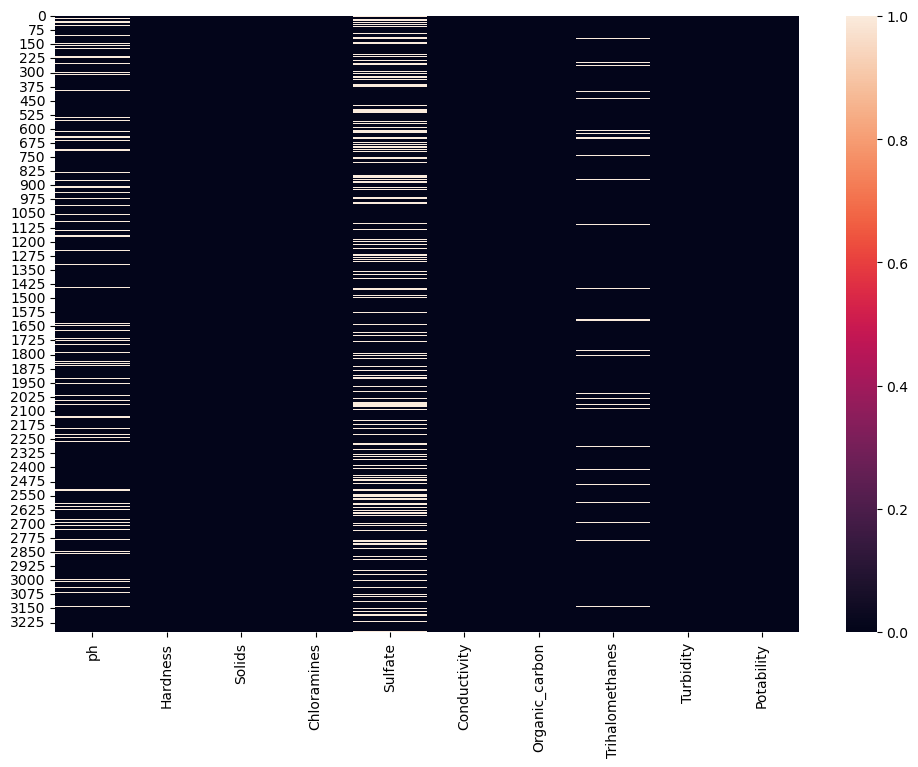

In [7]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull())

<Axes: >

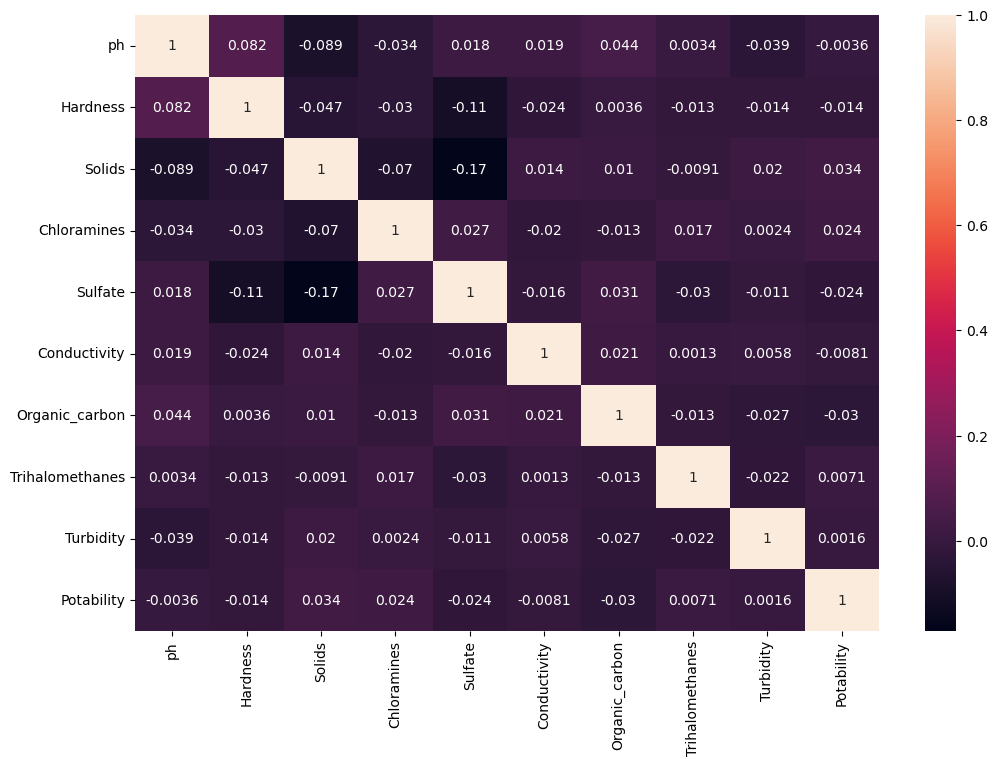

In [8]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

c:\Users\Sithara\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Sithara\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Sithara\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Potability', ylabel='count'>

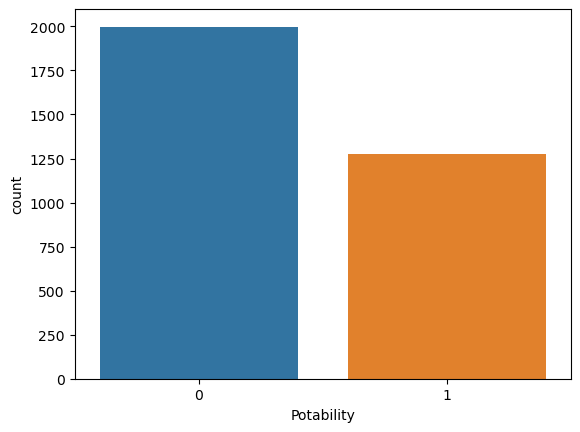

In [9]:
sns.countplot(x="Potability" , data=df)

In [10]:
df["Potability"].value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

c:\Users\Sithara\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Sithara\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Sithara\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Sithara\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.type

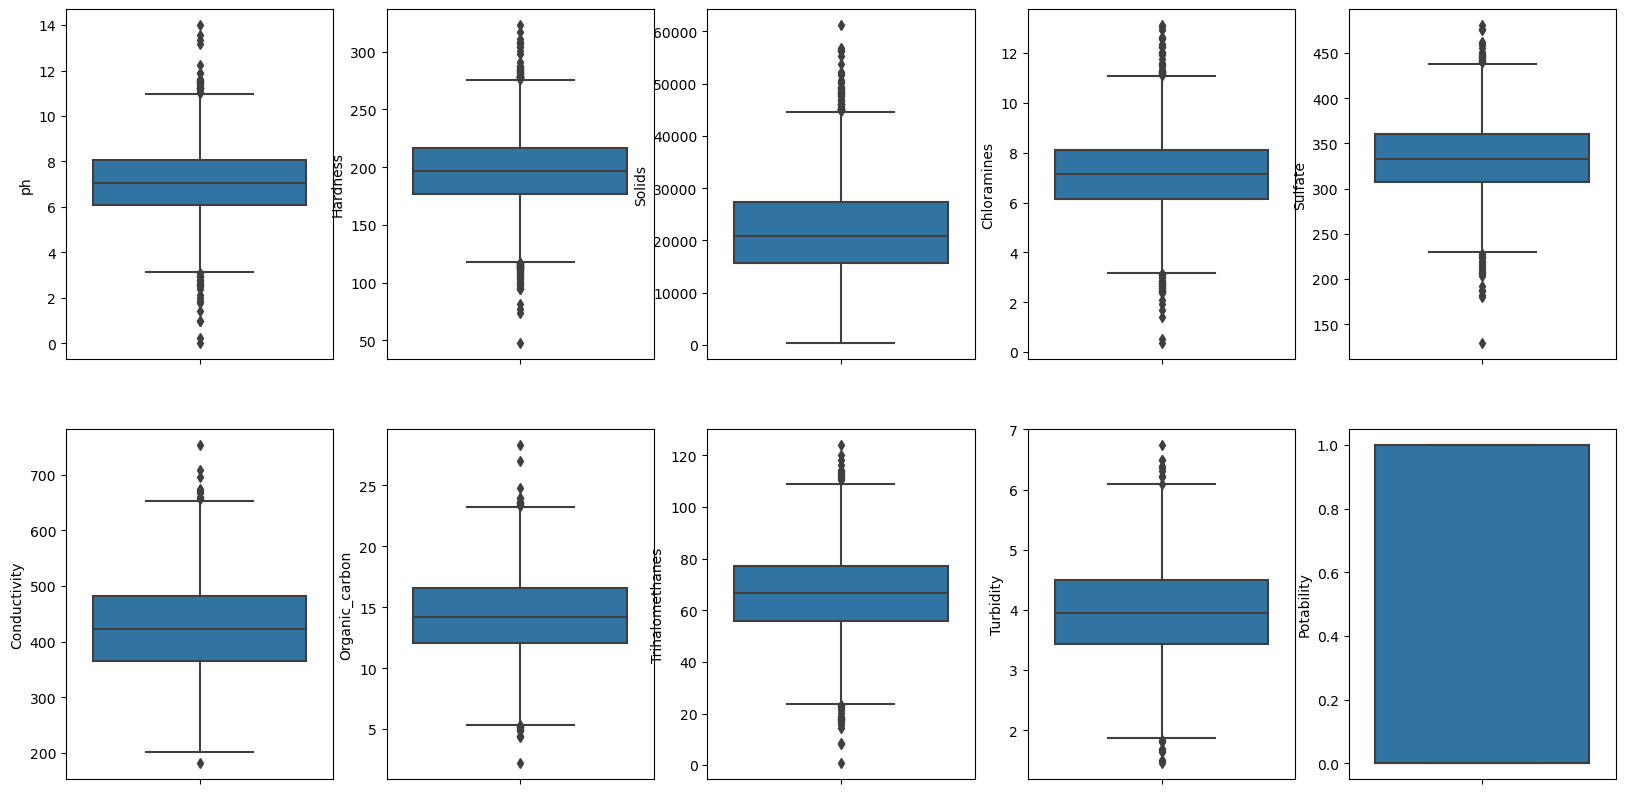

In [11]:
# Visulization dataset also checking for outliers

fig, ax = plt.subplots(ncols = 5 , nrows=2 , figsize=(20,10))

ax = ax.flatten()
index =0

for col,values in df.items():
    sns.boxplot(y=col,data=df,ax=ax[index])

    index +=1

c:\Users\Sithara\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Sithara\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Sithara\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Sithara\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.type

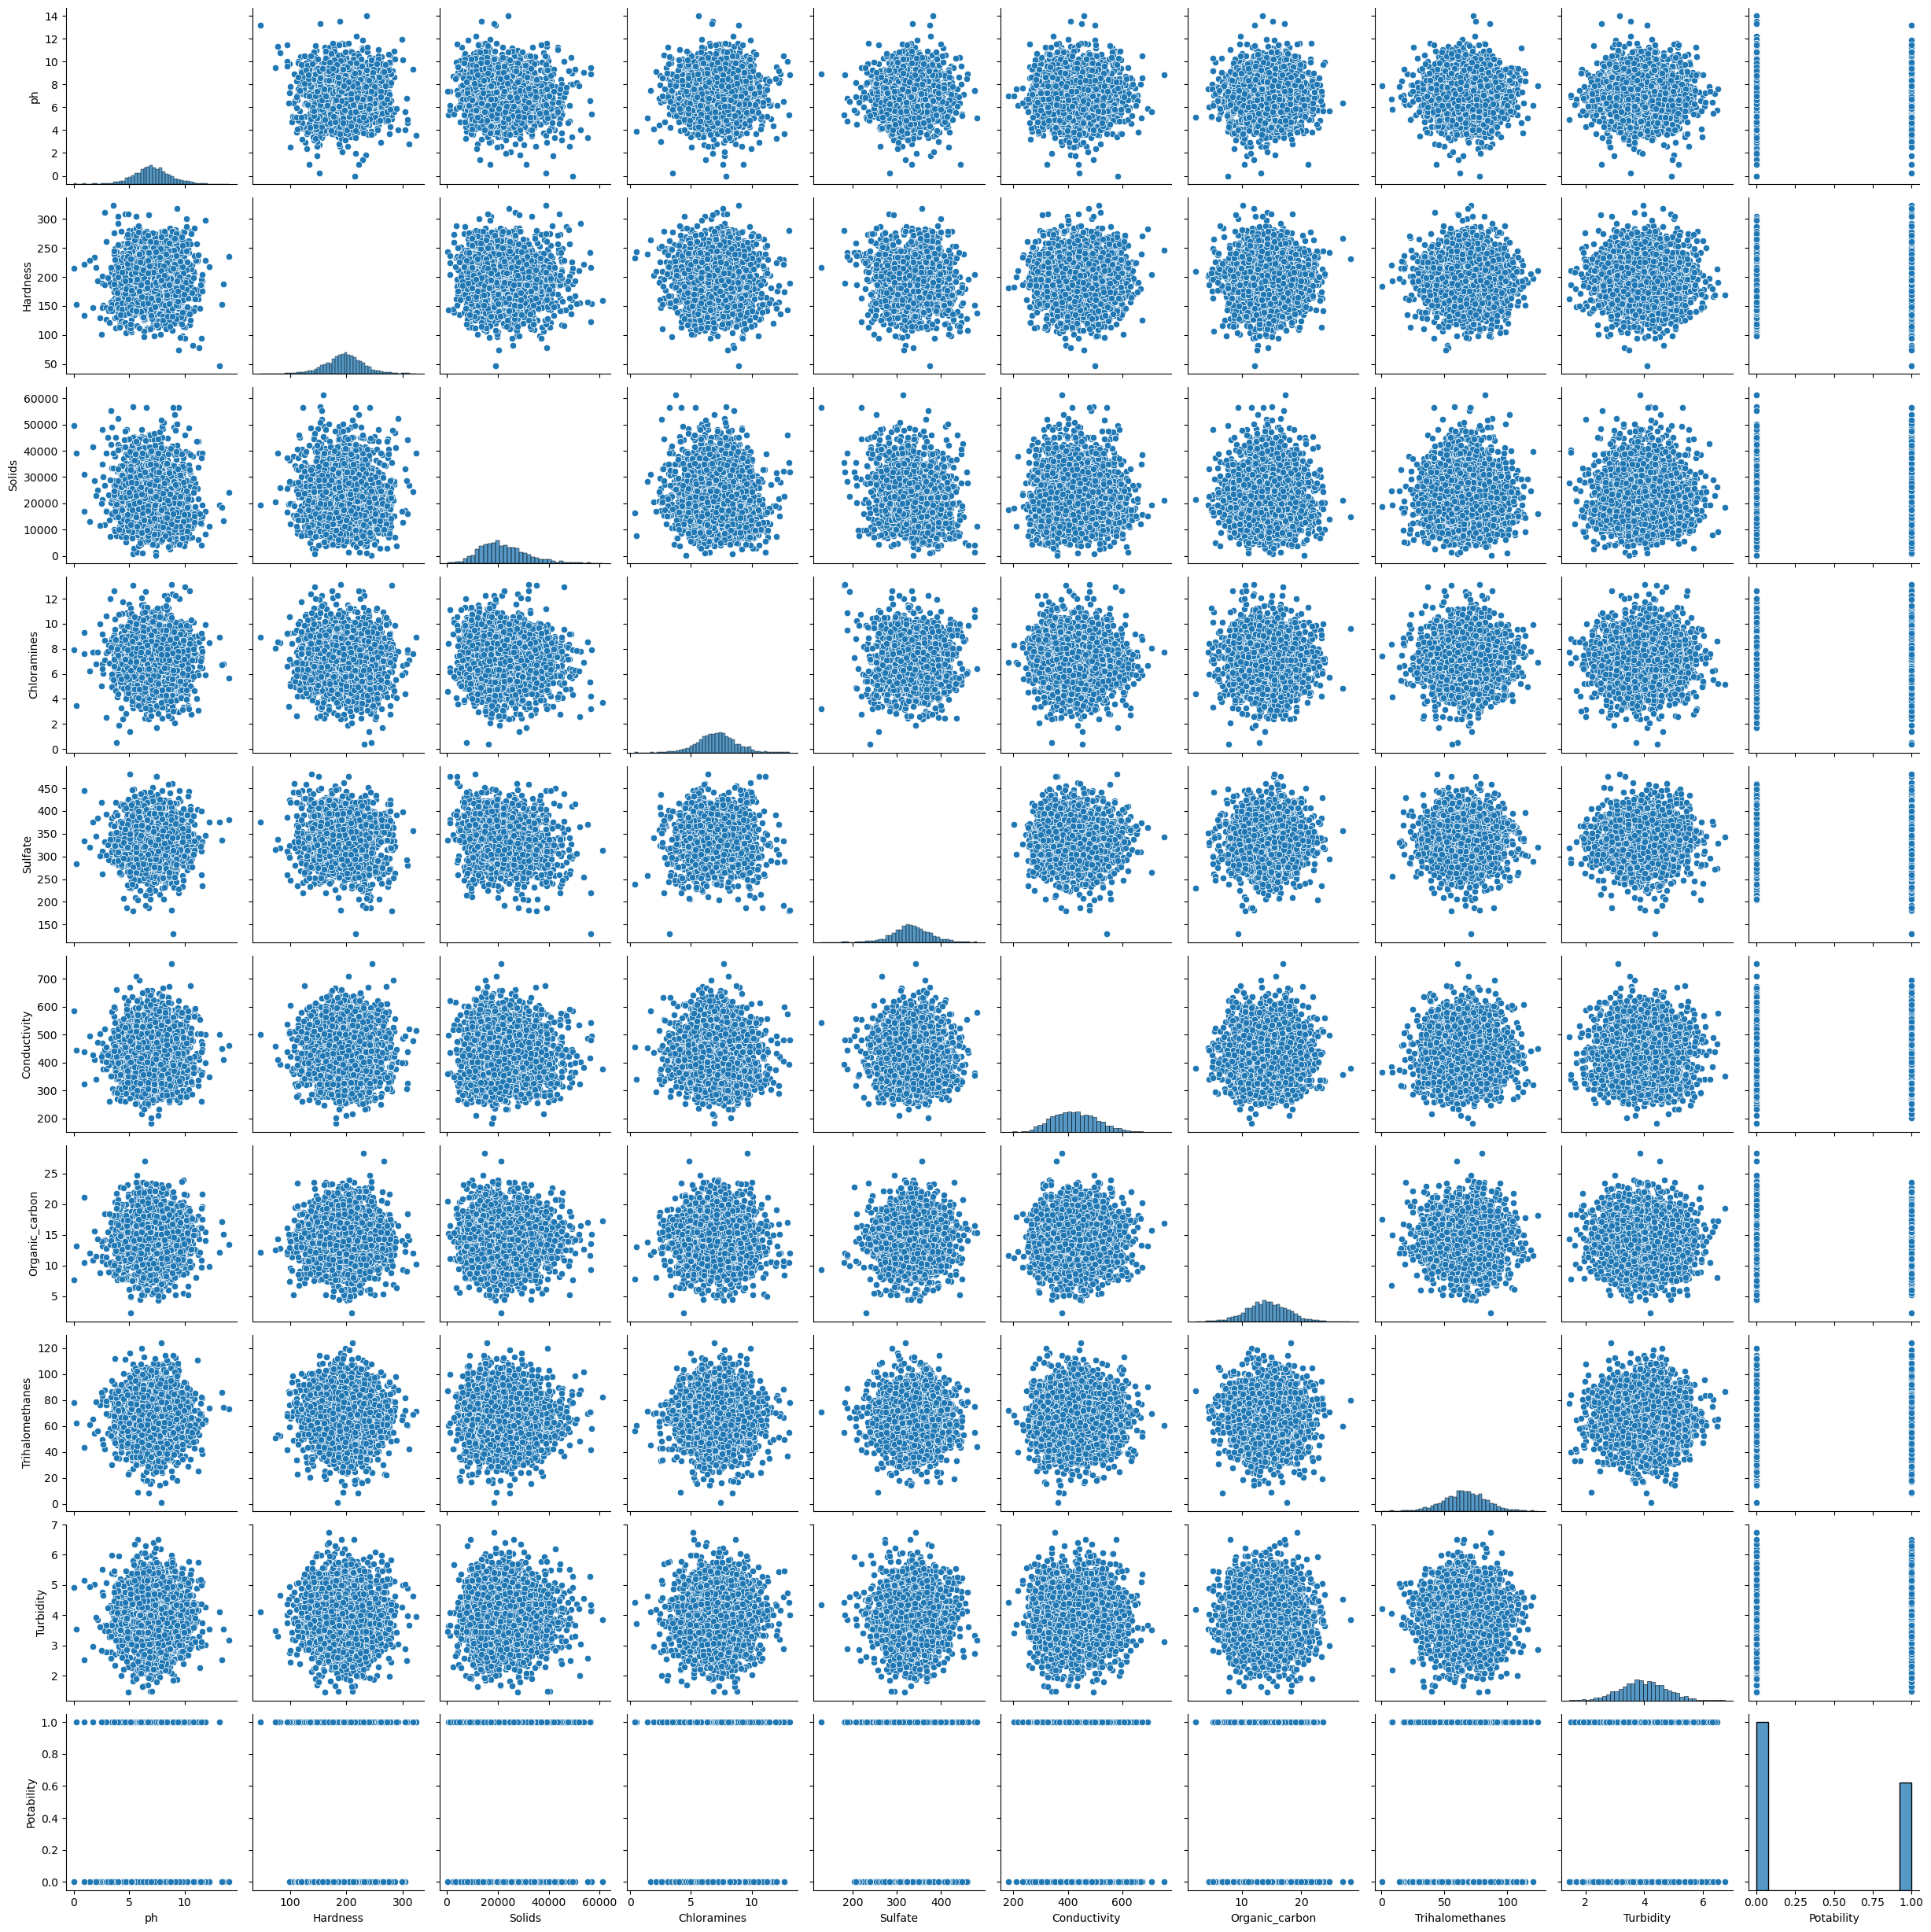

In [12]:
sns.pairplot(df) # every colomn compair with every colum like above heat plot

In [13]:
fig = px.pie(df,names = "Potability" ,hole=0.4, template="plotly_dark")
fig.show()

In [14]:
fig = px.scatter(df,x="ph",y="Sulfate",color="Potability",template="plotly_dark")
fig.show()

In [14]:
fig = px.scatter(df,x="Organic_carbon",y="Hardness",color="Potability",template="plotly_dark")
fig.show()

Filling null values

Text(0, 0.5, 'Percentage of missing values')

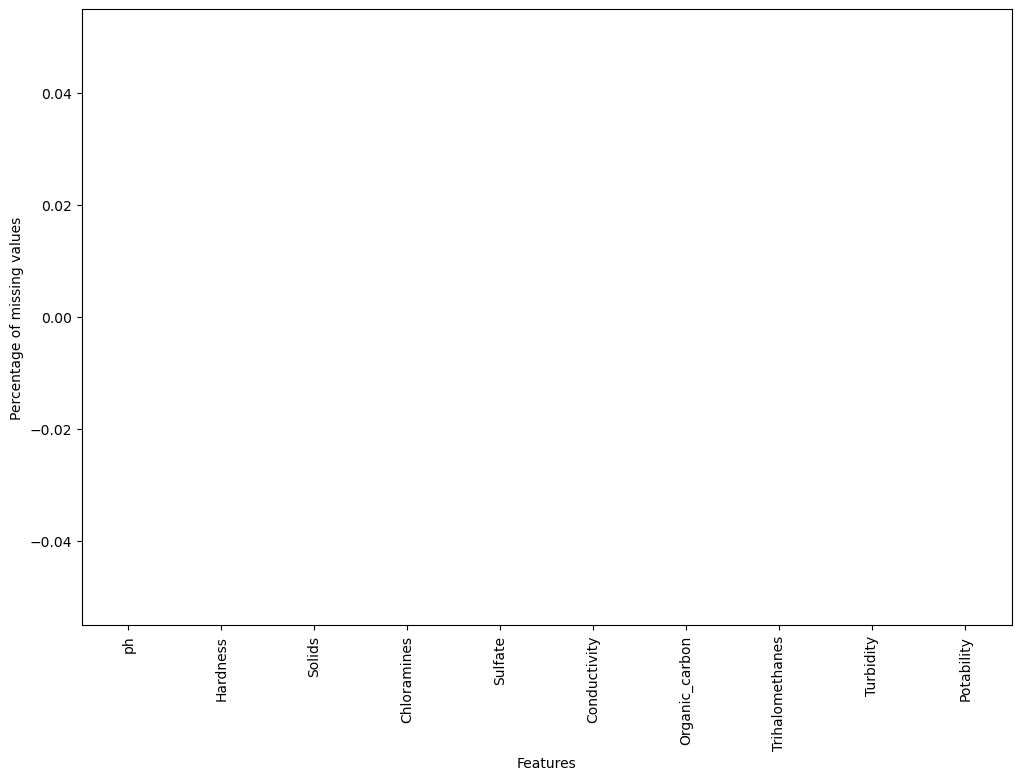

In [15]:
df.isnull().median().plot.bar(figsize = (12,8))
plt.xlabel("Features")
plt.ylabel("Percentage of missing values")

In [16]:
df.isnull()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,True,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
3271,False,False,False,False,False,False,False,False,False,False
3272,False,False,False,False,True,False,False,True,False,False
3273,False,False,False,False,True,False,False,False,False,False
3274,False,False,False,False,True,False,False,False,False,False


In [17]:
df["ph"]= df["ph"].fillna(df["ph"].median())
df["Sulfate"]= df["Sulfate"].fillna(df["Sulfate"].median())
df["Trihalomethanes"]= df["Trihalomethanes"].fillna(df["Trihalomethanes"].median())

In [18]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

<Axes: >

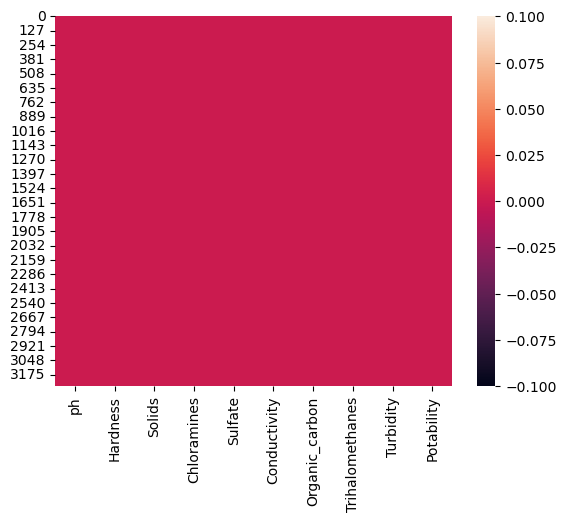

In [ ]:
sns.heatmap(df.isnull())

In [19]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.036752,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [20]:
x = df.drop("Potability",axis=1)
y= df["Potability"]

In [21]:
x.shape , y.shape

((3276, 9), (3276,))

In [22]:
scaler = StandardScaler()
x= scaler.fit_transform(x) #by fit transform calculating mean standerd deviation of the data and tranform is to apply for the all the columns 
x

array([[-2.54735465e-02,  2.59194711e-01, -1.39470871e-01, ...,
        -1.18065057e+00,  1.30543373e+00, -1.28629758e+00],
       [-2.28471739e+00, -2.03641367e+00, -3.85986650e-01, ...,
         2.70597240e-01, -6.39186284e-01,  6.84217891e-01],
       [ 6.97319183e-01,  8.47664833e-01, -2.40047337e-01, ...,
         7.81116857e-01,  8.00012586e-04, -1.16736546e+00],
       ...,
       [ 1.59565368e+00, -6.26829230e-01,  1.27080989e+00, ...,
        -9.81329234e-01,  2.18037800e-01, -8.56006782e-01],
       [-1.32494885e+00,  1.04135450e+00, -1.14405809e+00, ...,
        -9.42063817e-01,  7.02755628e-01,  9.50797383e-01],
       [ 5.44611034e-01, -3.85462310e-02, -5.25811937e-01, ...,
         5.60940070e-01,  7.79510303e-01, -2.12445866e+00]])

### Logistic Regression

In [23]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2)

In [24]:
x_train.shape , x_test.shape

((2620, 9), (656, 9))

In [25]:
#Logistic Regression 
from sklearn.linear_model import LogisticRegression

#object of LR
model_lr = LogisticRegression()

In [26]:
#Training Model
model_lr.fit(x_train , y_train)

LogisticRegression()

In [27]:
#Making the Prediction
pred_lr = model_lr.predict(x_test)


In [28]:
# accuracy score
accuracy_score_lr = accuracy_score(y_test, pred_lr)
accuracy_score_lr

0.6265243902439024

### Desision Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier

#creating the model object
model_dt = DecisionTreeClassifier(max_depth = 4)


In [30]:
#training of decision tree
model_dt.fit(x_train , y_train)

DecisionTreeClassifier(max_depth=4)

In [31]:
#making prediction using Decision tree
pred_dt = model_dt.predict(x_test)

In [32]:
accuracy_score_dt = accuracy_score(y_test, pred_dt)
accuracy_score_dt 

0.6646341463414634

decision tree give more accuracy than the logistic regression most of the times

In [33]:
#confusion matrics
cm2 = confusion_matrix(y_test,pred_dt)
cm2

array([[388,  23],
       [197,  48]], dtype=int64)

<Axes: >

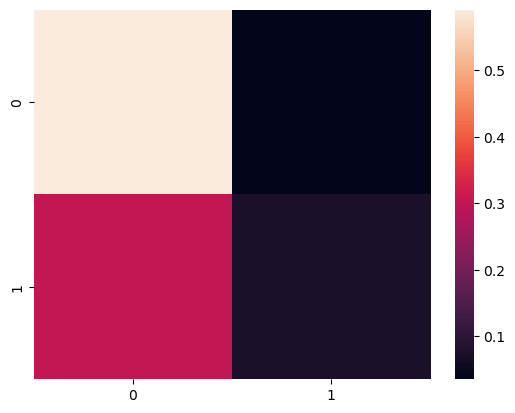

In [34]:
sns.heatmap(cm2/np.sum(cm2))

In [35]:
models = pd.DataFrame({
    "Model": ["LogisticRegression",
              "Decision Tree"],

    "Accuracy Score" : [accuracy_score_lr ,accuracy_score_dt]
            
})

In [36]:
models

,Model,Accuracy Score
0,LogisticRegression,0.626524
1,Decision Tree,0.664634


c:\Users\Sithara\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\Sithara\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\Sithara\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



,Model,Accuracy Score
1,Decision Tree,0.664634
0,LogisticRegression,0.626524


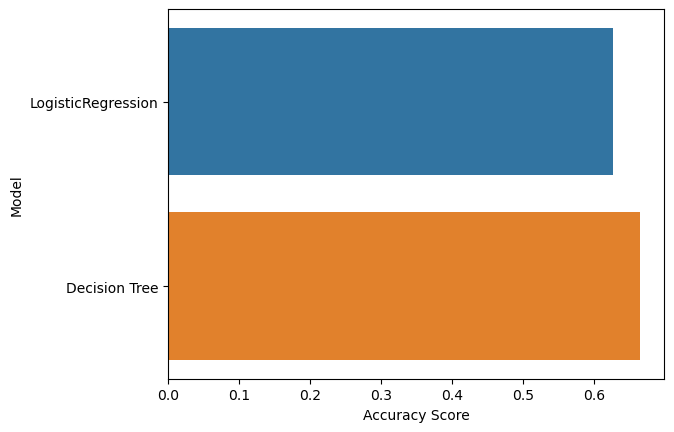

In [37]:
sns.barplot(x ="Accuracy Score" , y = "Model" , data=models)
models.sort_values(by = "Accuracy Score" , ascending=False)